# D212 Task 1

## Part I: Research Question

### A.  Describe the purpose of this data mining report by doing the following:

#### 1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following clustering techniques:

*  k-means

*  hierarchical

Can we used k-means clustering to cluster customers based on their variables into customers who churned and those who did not?


#### 2.  Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.
 
The goal in this analysis will be to generate clusters of customers based on similar variables the customers have and to see if these clusters have a relationship to churn.

## Part II: Technique Justification

### B.  Explain the reasons for your chosen clustering technique from part A1 by doing the following:

#### 1.  Explain how the clustering technique you chose analyzes the selected dataset. Include expected outcomes.

K-means clustering groups data into a specified k number of clusters based on the distance between the k number of randomly chosed data points and other data points around it. K-means will cluster data a number of times and will output the clusters that it finds which have the least amount of distance between the selected center data points, or the clusters with the least amount of variance between the center data points and the surrounding datapoints. The expected outcome will be clusters that share similar characteristics.

#### 2.  Summarize one assumption of the clustering technique.

One assumption of K-means clustering is that each cluster you are looking to find has about the same number of datapoints. This will allow k-means clustering to use a measure of the variance between points on the clusters to center in on the clusters you ar3e looking to find.

#### 3.  List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

a. Pandas allows us to work with the data through dataframes which allow for various simple data manipulations.

b. Numpy allows us to work with arrays of data, and is needed for some Pandas manipulations.

c. seaborn and matplotlib pyplot allow us to create visualizations easily so we can look at our data graphically.

d. sklearn allows us to use their machine learning algorithms in a black box manner, and to transform our data to work with our model.

## Part III: Data Preparation

### C.  Perform data preparation for the chosen dataset by doing the following

#### 1.  Describe one data preprocessing goal relevant to the clustering technique from part A1.

K-means clustering relies on the distance between points to make it's clusters. The distance between categorical variables is not meaningful and so we will drop all categorical variables from our analysis.

#### 2.  Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.

This is performed below.

#### 3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

In [2]:
# import data from csv
df = pd.read_csv('churn_clean.csv')

# set it so we can see all columns
pd.set_option('display.max_columns', None)

##### a. Change Column Names

It is useful to change the column names in order to better identify non-descriptive variable names.

In [3]:
# create a dictionary of current column names mapping to desired column names
survey_dict = {'Item1':'timely_responses', 
               'Item2':'timely_fixes', 
               'Item3':'timely_replacements', 
               'Item4':'reliability', 
               'Item5':'options', 
               'Item6':'respectful_response', 
               'Item7':'courteous_exchange', 
               'Item8':'evidence_of_active_listening'}

# rename the column names based on survey_dict
df = df.rename(columns=survey_dict)

##### b. Change Data Types

Now we will change the datatypes of our columns by passing a dictionary to df.astype mapping our column names to their new typing. We will do this because models will recognize the variable's datatype and deal with data appropriately.

In [4]:
# change the dataframe columns to more appropriate data types
df_cleaned = df.astype({'Population':int, 
                        'Children':int, 
                        'Age':int,
                        'Income':float, 
                        'Outage_sec_perweek':float, 
                        'Email':int, 
                        'Contacts':int, 
                        'Yearly_equip_failure':int,
                        'Tenure':float, 
                        'MonthlyCharge':float,
                        'Bandwidth_GB_Year':float}, copy=False)

In [5]:
# subset the dataframe to relevant variables
df_cleaned = df_cleaned[['Population', 'Age', 'Children', 'Income',
                         'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
                         'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

In [6]:
df_cleaned.head()

,Population,Age,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,38,68,0,28561.99,7.978323,10,0,1,6.795513,172.455519,904.536110
1,10446,27,1,21704.77,11.699080,12,0,1,1.156681,242.632554,800.982766
2,3735,50,4,9609.57,10.752800,9,0,1,15.754144,159.947583,2054.706961
3,13863,48,1,18925.23,14.913540,15,2,0,17.087227,119.956840,2164.579412
4,11352,83,0,40074.19,8.147417,16,2,1,1.670972,149.948316,271.493436


#### 2.  Identify the initial dataset variables that you will use to perform the analysis for the clustering question from part A1, and label each as continuous or categorical.

In [7]:
print('Variable and DataType')
types = pd.DataFrame(['continuous' if (df_cleaned[i].dtypes == int) or (df_cleaned[i].dtypes == float) 
                      else 'categorical' for i in df_cleaned.columns], df_cleaned.columns, columns=['DataType'])
types

Variable and DataType


,DataType
Population,continuous
Age,continuous
Children,continuous
Income,continuous
Outage_sec_perweek,continuous
Email,continuous
Contacts,continuous
Yearly_equip_failure,continuous
Tenure,continuous
MonthlyCharge,continuous


Above all of the variables used in this analysis and their datatypes are listed.

##### c. Scale Numerical Data

Now we will use sklearn's StandardScaler to scale our numeric data so nothing is improperly weighted.

In [8]:
import pandas as pd
pd.options.mode.chained_assignment = None 

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_cleaned[df_cleaned.columns] = scaler.fit_transform(df_cleaned[df_cleaned.columns])

In [10]:
df_cleaned

,Population,Age,Children,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.673405,0.720925,-0.972338,-0.398778,-0.679978,-0.666282,-1.005852,0.946658,-1.048746,-0.003943,-1.138487
1,0.047772,-1.259957,-0.506592,-0.641954,0.570331,-0.005288,-1.005852,0.946658,-1.262001,1.630326,-1.185876
2,-0.417238,-0.148730,0.890646,-1.070885,0.252347,-0.996779,-1.005852,0.946658,-0.709940,-0.295225,-0.612138
3,0.284537,-0.245359,-0.506592,-0.740525,1.650506,0.986203,1.017588,-0.625864,-0.659524,-1.226521,-0.561857
4,0.110549,1.445638,-0.972338,0.009478,-0.623156,1.316700,1.017588,0.946658,-1.242551,-0.528086,-1.428184
...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.631692,-1.453214,0.424900,0.564456,-0.196888,-0.005288,1.017588,-0.625864,1.273401,-0.294484,1.427298
9996,4.670977,-0.245359,0.890646,-0.201344,-1.095915,0.986203,1.017588,-0.625864,1.002740,0.811726,1.054194
9997,-0.647906,-0.245359,-0.506592,0.219037,-1.146198,-0.666282,-1.005852,-0.625864,0.487513,-0.061729,0.350984
9998,1.788974,-0.680187,-0.506592,-0.820588,0.695616,0.655706,0.005868,-0.625864,1.383018,1.863005,1.407713


#### 4.  Provide a copy of the cleaned data set.

In [11]:
df_cleaned.to_csv('t1_data')

#### Part IV: Analysis

### D.  Perform the data analysis and report on the results by doing the following:

#### 1.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

First we will look at an elbow plot to get our best number for k for our clustering by using a range of k values, fitting the data to the model and assessing the inertia score which is our variance between data points.

Next we will fit our data to our model using the appropriate amount of clusters from our plot and assess the accuracy of the model by comparing the label that the model gave our data to the true values.

#### 2.  Provide the code used to perform the clustering analysis technique from part 2.

##### Elbow Plot

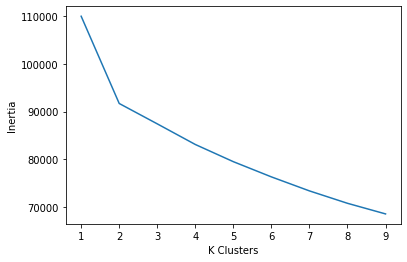

In [12]:
from sklearn.cluster import KMeans

inertias_dict = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cleaned)
    inertias_dict[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(inertias_dict.keys()), list(inertias_dict.values()))
plt.xlabel("K Clusters")
plt.ylabel("Inertia")
plt.show()

We can see in the above elbow plot that the best number for our k is two.

##### Model

In [13]:
# create kmeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_cleaned)

In [14]:
# put churn on the end to easilt visually compare the churn value to the label
ordered_cols = [i for i in df.columns if i != 'Churn'] + ['Churn']
df = df[ordered_cols]

In [15]:
# get label output from model
df['label'] = kmeans.labels_

In [16]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,timely_responses,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,evidence_of_active_listening,Churn,label
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4,No,0
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4,Yes,0
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3,No,0
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3,No,0
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5,Yes,0


In [17]:
pd.pivot_table(df, index=['Churn', 'label'], values='CaseOrder', aggfunc='count')

CaseOrder
Churn label           
No    0           2635
      1           4715
Yes   0           2366
      1            284

In the pivot table above we can see that a cluster label of 1 means no churn and a cluster label of 0 means yes churn. The above table also acts as a confusion matrix. We have 4715 true negatives, 2635 false negatices, 2366 true positives and 284 false positives. This means that the k-means clustering is clustering customers into those who churned and those who did not.

#### Model Scores

In [18]:
actual = df['Churn'].replace({'Yes':0, 'No':1})
pred = df['label']
metrics.accuracy_score(actual, pred)

0.7081

##### Accuracy

In [19]:
yes_actual = df.loc[df['Churn'] == 'Yes', 'Churn'].replace({'Yes':0})
no_actual = df.loc[df['Churn'] == 'No', 'Churn'].replace({'No':1})
yes_pred = df.loc[df['Churn'] == 'Yes', 'label']
no_pred = df.loc[df['Churn'] == 'No', 'label']

##### Recall

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
metrics.recall_score(yes_actual, yes_pred, average= 'weighted', labels=np.unique(yes_pred))

0.8928301886792452

In [22]:
metrics.recall_score(no_actual, no_pred, average= 'weighted', labels=np.unique(no_pred))

0.6414965986394557

## Part V: Data Summary and Implications

### E.  Summarize your data analysis by doing the following:

#### 1.  Explain the accuracy of your clustering technique.

The accuracy score of the k-means clustering used in this analysis was .7081 meaning that the clusters were either correct about a customer belonging in the churn or no churn categories 70.81% of the time.

#### 2.  Discuss the results and implications of your clustering analysis.

The result of this analysis was two clusters that turned out to have accurately clustered a customer based on churn status 70.81% of the time. This means that there are patterns in customer churn that would be worth analyzing. This model also seemed cluster customers who churned more accurately than than customers who did not churn with a recall score of about .893 for churning customers meaning that it predicticted them correctly around 89.3% of the time. 

#### 3.  Discuss one limitation of your data analysis.

One limitation of this analysis is that k-means cannot use categorical variables which may provide more insight, such as services, that could help cluster customers into these categories.

#### 4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

Based on the results of this analysis it may be worth it to analyze the variables used in this analysis to find their relationship with customer churn. Since k-means found two fairly accurate clusters of customer who churned and did not, it is likely that these variables play a considerable role in customer churn. It may be worthwhile to analyze the relationships between those customers that did churn to decide what common variables put them in this cluster and to potentially take action based on these variables.

## Part VI: Demonstration

### F.  Provide a Panopto video recording that includes a demonstration of the functionality of the code used for the analysis and a summary of the programming environment.

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=c61f226e-fc44-4801-8b2e-ade601401218 

### G.  Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.
 
N/A

### H.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

N/A